# Task 3

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse 

G = pd.read_pickle('small_graph.pickle')
G

Number of nodes: 537
Number of edges: 7715
Average degree: 28.733705772811916
Is the graph connected? True
Number of connected components: 1


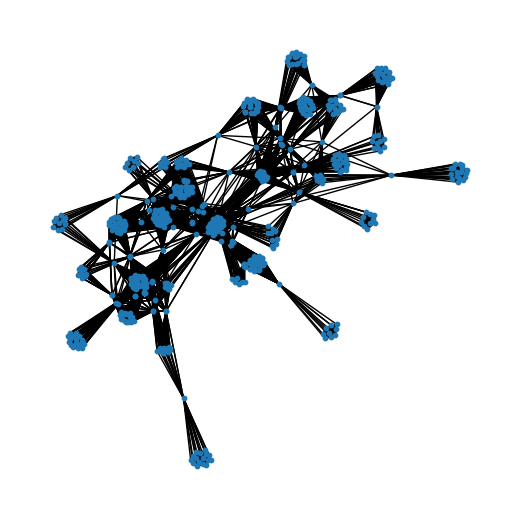

In [5]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
degrees = [G.degree(n) for n in G.nodes()]
print(f"Average degree: {sum(degrees) / len(degrees)}")
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")

plt.figure(figsize=(5, 5)) 
pos = nx.spring_layout(G)
nx.draw(G, pos , with_labels=False, node_size=10)
plt.show()

In [3]:
#a dictionary of all the nodes and their respective degrees 
#degrees is a dictionary that you can use to look up the degree of any node in the graph. 
#For example, degrees[node] will give you the degree of node
degrees = dict(G.degree())

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

for node in list(G.nodes())[:1]:
    print(f"Node: {node}")
    print(f"Degree: {degrees[node]}")
    print(f"Degree Centrality: {degree_centrality[node]}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print(f"Eigenvector Centrality: {eigenvector_centrality[node]}")
    print()


Node: spotify:track:00qOE7OjRl0BpYiCiweZB2
Degree: 19
Degree Centrality: 0.03544776119402985
Closeness Centrality: 0.22964867180805484
Betweenness Centrality: 0.0
Eigenvector Centrality: 4.084216235227726e-06



In [18]:
def recommend_songs(graph, input_song, num_recommendations=5):
    recommended_songs = []

    if input_song in graph.nodes:
        # Perform a graph walk based on edge weights
        neighbors = list(graph[input_song])
        neighbor_weights = [(neighbor, graph.edges[input_song, neighbor]['weight']) for neighbor in neighbors]
        
        # Sort neighbors by edge weights in descending order
        neighbor_weights.sort(key=lambda x: x[1], reverse=True)
        
        # Recommend songs based on edge weights
        for neighbor, weight in neighbor_weights[:num_recommendations]:
            recommended_songs.append((neighbor, weight))
        
        return recommended_songs
    else:
        print("Input song not found in the graph.")
        return None

recommended_songs = recommend_songs(G, 'spotify:track:6I6NX6tjGsxFAsIfGzY9lJ', num_recommendations=5)
print("Recommended songs:")
for song in recommended_songs:
    print(song)

Recommended songs:
('spotify:track:0zO8ctW0UiuOefR87OeJOZ', 1)
('spotify:track:16qYlQ6koFxYVbiJbGHblz', 1)
('spotify:track:2ANLarE8yHVsLWW21nj79M', 1)
('spotify:track:2BqQQXuBOuhaWeUP7okEx0', 1)
('spotify:track:439TlnnznSiBbQbgXiBqAd', 1)


In [19]:
import heapq

def recommend_songs(graph, start_song, num_recommendations):
    if start_song not in graph:
        return "The song is not in the graph."

    recommended_songs = []
    song_scores = []

    # Add the start song's neighbors to the heap with their edge weight as the score
    for neighbor in graph[start_song]:
        heapq.heappush(song_scores, (-graph[start_song][neighbor]['weight'], neighbor))

    # While we don't have enough recommendations and the heap is not empty
    while len(recommended_songs) < num_recommendations and song_scores:
        # Get the song with the highest score
        score, song = heapq.heappop(song_scores)

        # Add the song and its score to the list of recommended songs
        recommended_songs.append((song, -score))

        # Add the song's neighbors to the heap with their edge weight as the score
        for neighbor in graph[song]:
            if neighbor not in [song for song, _ in recommended_songs]:
                heapq.heappush(song_scores, (-graph[song][neighbor]['weight'], neighbor))

    return recommended_songs

start_song = "spotify:track:6I6NX6tjGsxFAsIfGzY9lJ"  
num_recommendations = 5 
recommended_songs = recommend_songs(G, start_song, num_recommendations)

print("Recommended songs:")
for song, score in recommended_songs:
    print(f"{song} (score: {score})")

Recommended songs:
spotify:track:0zO8ctW0UiuOefR87OeJOZ (score: 1)
spotify:track:16qYlQ6koFxYVbiJbGHblz (score: 1)
spotify:track:16qYlQ6koFxYVbiJbGHblz (score: 1)
spotify:track:2ANLarE8yHVsLWW21nj79M (score: 1)
spotify:track:2ANLarE8yHVsLWW21nj79M (score: 1)
